In [16]:
import numpy as np
import os
import cv2
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import scipy.misc
from PIL import Image

# Model input shape

In [124]:
def npy_to_rgb_image(n):
    cv2_rgb = np.uint8(np.transpose(n, (1, 2, 0)) * 255.0)
    cv2_bgr = cv2.cvtColor(cv2_rgb, cv2.COLOR_BGR2RGB)
    plt.imshow(cv2_rgb)
    
def npy_to_depth_image(n):
    np_depth = np.uint16(ref_nyu_depth[0] * 1000)
    plt.imshow(np_depth)
    
ref_nyu_rgb = np.load("")
ref_nyu_depth = np.load("")
ref_sun_rgb = np.load("")
ref_sun_depth = np.load("")

print(ref_nyu_rgb.shape, ref_nyu_rgb.dtype)
print(ref_nyu_depth.shape, ref_nyu_depth.dtype)
print(ref_sun_rgb.shape, ref_sun_rgb.dtype)
print(ref_sun_depth.shape, ref_sun_depth.dtype)

# rgb : (3, 240, 320)
# depth: (1, 240, 320)

(3, 240, 320) float32
(1, 240, 320) float32
(3, 240, 320) float32
(3, 240, 320) float32


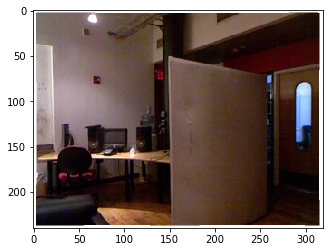

In [144]:
npy_to_rgb_image(ref_nyu_rgb)

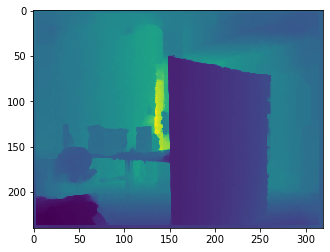

In [145]:
npy_to_depth_image(ref_nyu_depth)

---

# My Dataset Preprocessing

## Resize/Reshape npy (320, 240)

In [129]:
def reshape_npy_rgb(filepath):
    n = np.load(filepath)
    img = Image.fromarray(n)
    img = img.resize(size=(320, 240))
    resized_n = np.array(img, dtype='float32')
    reshaped_n = np.transpose(resized_n, (2, 0, 1)) / 255.0
    return reshaped_n

In [130]:
def reshape_npy_depth(filepath):
    n = np.load(filepath)
    img = Image.fromarray(n)
    img = img.resize(size=(320, 240))
    resized_n = np.array(img, dtype='float32')
    reshaped_n = b.reshape(1, 240, 320) / 10000.0
    return reshaped_n

In [65]:
my_data = ""
a = resize_npy(my_data)

In [131]:
PATH = ""
OUTPATH = ''

for filename in os.listdir(PATH):
    if filename.endswith('RGB.npy'):
        print(filename)
        img = reshape_npy_rgb(PATH + "/" + filename)
        n = np.array(img, dtype='float32')
        np.save(OUTPATH + "/" + filename, n)
    elif filename.endswith('DEPTH.npy'):
        print(filename)
        img = reshape_npy_depth(PATH + "/" + filename)
        n = np.array(img, dtype='float32')
        np.save(OUTPATH + "/" + filename, n)

200608-153017-386665_DEPTH.npy
200608-153017-386665_RGB.npy
200608-153021-333835_DEPTH.npy
200608-153021-333835_RGB.npy
200608-153035-719767_DEPTH.npy
200608-153035-719767_RGB.npy
200608-153043-810561_DEPTH.npy
200608-153043-810561_RGB.npy
200608-153113-434993_DEPTH.npy
200608-153113-434993_RGB.npy
200608-153113-969345_DEPTH.npy
200608-153113-969345_RGB.npy
200608-153125-496224_DEPTH.npy
200608-153125-496224_RGB.npy


## image -> npy

In [5]:
def image_to_npy(image_path, image_name, debug=False):
    img = Image.open(image_path + "/" + image_name)
    data = np.array(img, dtype='float32') # uint8
    
    if debug:
        save_path = image_name.split('.')[0] + ".npy"
        np.save(save_path, data)
        test_img = np.load(save_path)
        plt.imshow(test_img)
    return data

In [ ]:
image_to_npy(image_path='',
            image_name='',
            debug=True)

# Inference Result Visualization

In [8]:
def show_np_to_image(n):
    plt.imshow(n)
    plt.show()
    
def save_np_to_image(path, n):
    mpimg.imsave(path, n)

In [20]:
PATH="E:\\nyu_models\\rgb_imagenet_pretrain"

for filename in os.listdir(PATH):
    filepath = PATH + "/" + filename
    n = np.load(filepath)

#     show_np_to_image(n)
    save_np_to_image(PATH + "/" + filename.split('.')[0] + ".png", n)

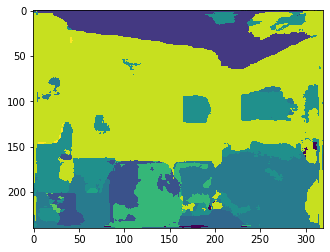

In [13]:
show_np_to_image(np.load('E:\\nyu_models\\rgbd_scenenet_pretrain\\out_1.npy'))

# Test

In [223]:
img_ids = list()
for i in os.listdir(""):
    if i.endswith('.jpg'):
        img_ids.append(i.split('.')[0].split('_')[0])
img_ids = list(set(img_ids))

In [225]:
img_ids

['200608-153043-810561',
 '200608-153021-333835',
 '200608-153035-719767',
 '200608-153113-434993',
 '200608-153125-496224',
 '200608-153017-386665',
 '200608-153113-969345']

In [ ]:
seg_path_1 = ""
seg_path_2 = ""
seg_path_3 = ""
seg_path_4 = ""
seg_path_5 = ""
seg_path_6 = ""
seg_path_7 = ""
seg_path_8 = ""
seg_path_9 = ""
seg_path_10 = ""

source_path = ""

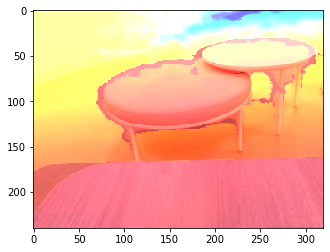

In [237]:
for filename in img_ids:
    img1 = cv2.imread(source_path + filename + "_RGB.jpg")
    img2 = cv2.imread(source_path + filename + "_DEPTH.jpg")
    img1 = cv2.resize(img1, dsize=(320, 240))
    img2 = cv2.resize(img2, dsize=(320, 240))
    dst = cv2.add(img1, img2)
    
    mpimg.imsave(source_path + "out_" + filename + ".jpg", dst)
    
    plt.imshow(dst)
    
    result1 = cv2.add(img1, cv2.imread(seg_path_1 + filename + ".png"))
    result2 = cv2.add(img1, cv2.imread(seg_path_2 + filename + ".png"))
    result3 = cv2.add(img1, cv2.imread(seg_path_3 + filename + ".png"))
    result4 = cv2.add(img1, cv2.imread(seg_path_4 + filename + ".png"))
    result5 = cv2.add(img1, cv2.imread(seg_path_5 + filename + ".png"))
    result6 = cv2.add(img1, cv2.imread(seg_path_6 + filename + ".png"))
    result7 = cv2.add(img1, cv2.imread(seg_path_7 + filename + ".png"))
    result8 = cv2.add(img1, cv2.imread(seg_path_8 + filename + ".png"))
    result9 = cv2.add(img1, cv2.imread(seg_path_9 + filename + ".png"))
    result10 = cv2.add(img1, cv2.imread(seg_path_10 + filename + ".png"))

    mpimg.imsave(seg_path_1 + "out_" + filename + ".png", result1)
    mpimg.imsave(seg_path_2 + "out_" + filename + ".png", result2)
    mpimg.imsave(seg_path_3 + "out_" + filename + ".png", result3)
    mpimg.imsave(seg_path_4 + "out_" + filename + ".png", result4)
    mpimg.imsave(seg_path_5 + "out_" + filename + ".png", result5)
    mpimg.imsave(seg_path_6 + "out_" + filename + ".png", result6)
    mpimg.imsave(seg_path_7 + "out_" + filename + ".png", result7)
    mpimg.imsave(seg_path_8 + "out_" + filename + ".png", result8)
    mpimg.imsave(seg_path_9 + "out_" + filename + ".png", result9)
    mpimg.imsave(seg_path_10 + "out_" + filename + ".png", result10)

In [209]:
filename = "200608-153113-434993"

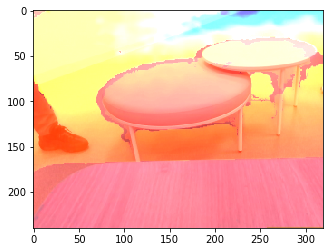

In [213]:
img1 = cv2.imread(source_path + filename + "_RGB.jpg")
img2 = cv2.imread(source_path + filename + "_DEPTH.jpg")
img1 = cv2.resize(img1, dsize=(320, 240))
img2 = cv2.resize(img2, dsize=(320, 240))
dst = cv2.add(img1, img2)
plt.imshow(dst)

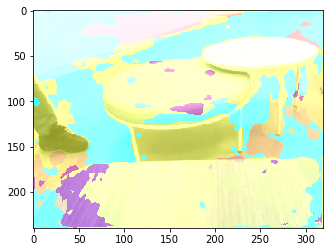

In [221]:
plt.imshow(result1)
plt.imshow(result2)

# 3D Viewer

In [2]:
import open3d as o3d
import numpy as np
import cv2
from matplotlib import pyplot as plt

RGBDImage of size 
Color image : 320x240, with 3 channels.
Depth image : 320x240, with 1 channels.
Use numpy.asarray to access buffer data.


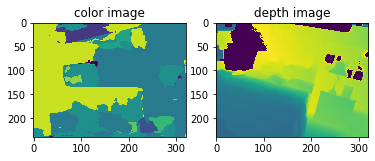

In [28]:
color_raw = o3d.io.read_image("E:\\nyu_models\\rgbd_scenenet_pretrain\\out_2.png")
# color_raw = o3d.io.read_image("G:\\data\\SUNRGBD\\0002_rgb.png")
depth_raw = o3d.io.read_image("G:\\data\\SUNRGBD\\0002_depth.png")
rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(color_raw, depth_raw, depth_scale=1000.0, depth_trunc=3.0, convert_rgb_to_intensity=False)
print(rgbd_image)

plt.subplot(1, 2, 1)
plt.title('color image')
plt.imshow(rgbd_image.color)
plt.subplot(1, 2, 2)
plt.title('depth image')
plt.imshow(rgbd_image.depth)
plt.show()

pcd = o3d.geometry.PointCloud.create_from_rgbd_image(
        rgbd_image,
        o3d.camera.PinholeCameraIntrinsic(
            o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault))

pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
o3d.visualization.draw_geometries([pcd])

geometry::PointCloud with 47695 points.